In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn


In [2]:
import keras

Using TensorFlow backend.


## COMP 3132 -  Machine Learning with Python
__Week 3 lecture__

### [github.com/kamrik/ML2](https://github.com/kamrik/ML2)

### [slido.com/COMP3132](http://slido.com/COMP3132)

## Plan for today
 - Classification of IMDB reviews, line by line
   - Start with sklearn
   - Review model evaluation techniques
   - Classification using Keras
 

## Home assignment 1 is due tomorrow night

## Classifying movie reviews as positive or negative
 * Back on Nov 13th we classified Yelp reviews - [ML1/exercises/yelp.ipynb](https://github.com/kamrik/ML1/blob/master/exercises/yelp.ipynb) (see [solutions](https://nbviewer.jupyter.org/url/kamrik.org/ML1/yelp_solutions.ipynb))

## Preprocessing - representing the text

In [3]:
from keras.datasets import imdb

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 5s 0us/step


In [5]:
words = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 1us/step


## Explore the data

In [17]:
type(words) 

dict

## Where the data comes from
 - Does it get cached?

In [18]:
imdb.load_data()
imdb.get_word_index()

## What's that `npz` file?
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.savez.html

## Can we read the text?

In [36]:
# How do we convert numbers back to text given the dictionary?

## Reversed dict
 - The words in the index are numbered in ascending frequency

In [39]:
nums = train_data[5]
print(nums)

[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]


## One-hot encoding

In [6]:
N = 10000
vec = np.zeros(N, dtype='float32')
vec

# Set the words that are present to 1

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension), dtype='float32')
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [8]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]], dtype=float32)

## Use sklearn

In [9]:
# Import
from sklearn.naive_bayes import MultinomialNB

In [10]:
# Instantiate
clf = MultinomialNB()

In [11]:
# Fit
t = time.time()
clf.fit(x_train, train_labels)
print("Elapsed: ", time.time() - t)

Elapsed:  9.845374822616577


In [12]:
# Predict
x_pred = clf.predict(x_test)

## Find model accuracy

In [13]:
x_pred == test_labels

array([ True,  True,  True, ...,  True,  True, False])

## Let's try the same with neural nets

In [16]:
from keras import models
from keras import layers

## How many layers? How many neurons?
 - Output is probability of positive

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
t = time.time()
history = model.fit(x_train,
                    train_labels,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_test, test_labels))
print("Elapsed: ", time.time() - t)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 5s 214us/step - loss: 0.4483 - acc: 0.8172 - val_loss: 0.3362 - val_acc: 0.8767
Epoch 2/10
25000/25000 [==============================] - 3s 119us/step - loss: 0.2546 - acc: 0.9096 - val_loss: 0.3166 - val_acc: 0.8706
Epoch 3/10
25000/25000 [==============================] - 3s 111us/step - loss: 0.1968 - acc: 0.9297 - val_loss: 0.2821 - val_acc: 0.8890
Epoch 4/10
25000/25000 [==============================] - 3s 110us/step - loss: 0.1669 - acc: 0.9411 - val_loss: 0.2950 - val_acc: 0.8834
Epoch 5/10
25000/25000 [==============================] - 3s 110us/step - loss: 0.1431 - acc: 0.9487 - val_loss: 0.3223 - val_acc: 0.8783
Epoch 6/10
25000/25000 [==============================] - 3s 113us/step - loss: 0.1269 - acc: 0.9556 - val_loss: 0.3468 - val_acc: 0.8726
Epoch 7/10
25000/25000 [==============================] - 3s 110us/step - loss: 0.1130 - acc: 0.9608 - val_loss: 0.3613 - 

## Train / Validation / Test

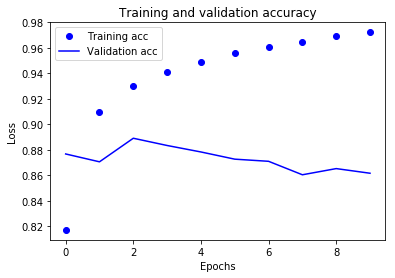

In [23]:
plt.clf()   # clear figure
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']
epochs = np.arange(len(acc_values))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()